<a href="https://colab.research.google.com/github/arthbohra/Biomedical-Image-Processing/blob/main/Medical_Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PIP Install Statements**

In [ ]:
!pip install firebase
!pip install gcloud
!pip install sseclient
!pip install pycrypto
!pip install requests-toolbelt
!pip install python_jwt

**Mounting Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import json
import os
import configparser
from datascience import *
import random 
import io
import pandas as pd
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import os
import json
import csv
import cv2 as cv

In [ ]:
path = ('/content/drive/MyDrive/disc1')
patients = []
raw_images = []
text_files = []
for filename in os.listdir(path):
  f = os.path.join(path, filename)
  if (os.path.isfile(f) != True):
    patients.append(f)
patients_data = []
#parse through the patients
for patient in patients:
  patient_data = []
  for filename in os.listdir(patient):
    f = os.path.join(patient, filename)
    # open the text file 
    if f.endswith('txt'):
      with open(f) as text_file:
        lines = text_file.readlines()
        patient_data.append(lines[0]) # session
        patient_data.append(lines[1]) # age
        patient_data.append(lines[2]) # gender
        patient_data.append(lines[3]) # hand
        patient_data.append(lines[9]) # eTIV
        patient_data.append(lines[10]) # ASF
        patient_data.append(lines[11]) # nWBV
    elif "RAW" in f:
      for images in os.listdir(f):
        g = os.path.join(f, images)
        # making sure we are looking at the right file type, not looking at duplicates or the 'extra' scan
        if g.endswith('gif') and "(1)" not in g and "mpr-4" not in g:
          patient_data.append(g)
  patients_data.append(patient_data)
patients_data

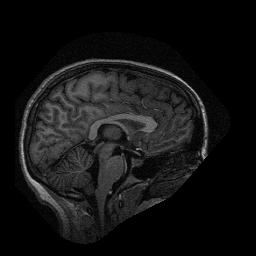

In [30]:
# plotting an example MRI scan
example = patients_data[0][1][1]
example_plot = plt.imread(example)
cv2_imshow(example_plot) 

In [50]:
columns = ["patient", "age", "gender", "hand", "eTIV", "ASF", "nWBV", "session_1", "session_2", "session_3"]
rows = patients_data
filename = "data.csv"
with open(filename, 'w') as csvfile: 
    # writing the data to a csv file 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(columns) 
    csvwriter.writerows(rows)
df = pd.read_csv("data.csv")
df.head(10)

,patient,age,gender,hand,eTIV,ASF,nWBV,session_1,session_2,session_3
0,SESSION ID: OAS1_0014_MR1\n,AGE: 19\n,M/F: Female\n,HAND: Right\n,eTIV: 1525.00\n,ASF: 1.15\n,nWBV: 0.856\n,/content/drive/MyDrive/disc1/OAS1_0014_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0014_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0014_MR1/RAW...
1,SESSION ID: OAS1_0003_MR1\n,AGE: 73\n,M/F: Female\n,HAND: Right\n,eTIV: 1454.00\n,ASF: 1.21\n,nWBV: 0.708\n,/content/drive/MyDrive/disc1/OAS1_0003_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0003_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0003_MR1/RAW...
2,SESSION ID: OAS1_0038_MR1\n,AGE: 23\n,M/F: Female\n,HAND: Right\n,eTIV: 1443.00\n,ASF: 1.22\n,nWBV: 0.839\n,/content/drive/MyDrive/disc1/OAS1_0038_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0038_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0038_MR1/RAW...
3,SESSION ID: OAS1_0015_MR1\n,AGE: 76\n,M/F: Male\n,HAND: Right\n,eTIV: 1738.00\n,ASF: 1.01\n,nWBV: 0.719\n,/content/drive/MyDrive/disc1/OAS1_0015_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0015_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0015_MR1/RAW...
4,SESSION ID: OAS1_0016_MR1\n,AGE: 82\n,M/F: Male\n,HAND: Right\n,eTIV: 1477.00\n,ASF: 1.19\n,nWBV: 0.739\n,/content/drive/MyDrive/disc1/OAS1_0016_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0016_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0016_MR1/RAW...
5,SESSION ID: OAS1_0001_MR1\n,AGE: 74\n,M/F: Female\n,HAND: Right\n,eTIV: 1344.00\n,ASF: 1.31\n,nWBV: 0.743\n,/content/drive/MyDrive/disc1/OAS1_0001_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0001_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0001_MR1/RAW...
6,SESSION ID: OAS1_0028_MR1\n,AGE: 86\n,M/F: Female\n,HAND: Right\n,eTIV: 1449.00\n,ASF: 1.21\n,nWBV: 0.738\n,/content/drive/MyDrive/disc1/OAS1_0028_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0028_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0028_MR1/RAW...
7,SESSION ID: OAS1_0002_MR1\n,AGE: 55\n,M/F: Female\n,HAND: Right\n,eTIV: 1147.00\n,ASF: 1.53\n,nWBV: 0.810\n,/content/drive/MyDrive/disc1/OAS1_0002_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0002_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0002_MR1/RAW...
8,SESSION ID: OAS1_0029_MR1\n,AGE: 21\n,M/F: Male\n,HAND: Right\n,eTIV: 1653.00\n,ASF: 1.06\n,nWBV: 0.858\n,/content/drive/MyDrive/disc1/OAS1_0029_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0029_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0029_MR1/RAW...
9,SESSION ID: OAS1_0017_MR1\n,AGE: 21\n,M/F: Male\n,HAND: Right\n,eTIV: 1689.00\n,ASF: 1.04\n,nWBV: 0.845\n,/content/drive/MyDrive/disc1/OAS1_0017_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0017_MR1/RAW...,/content/drive/MyDrive/disc1/OAS1_0017_MR1/RAW...
